# seamount roms case, PV inversion

We start from pressure interpolated on a flat grid.
This pressure leads to a geostrophic streamfunction from which one my derive QG potential vorticity.
The inversion of this potential vorticity will exactly lead to the initial streamfunction.
The goal is to estimate how close to bottom sqg is the solution.



In [2]:
import matplotlib.pyplot as plt

from utils import *

In [3]:
path_work = '/home1/datawork/aponte/seamount/'
#path_output = path_work+'frompv_ybg_topdir/'
#
#path_output = path_work+'fromnc_noybg_topneu'
path_output = path_work+'fromnc_ybg_topneu/'
#path_output = path_work+'fromnc_ybg_topdir/'

---

## look at inputs

In [4]:
ds_in = open_input(path_output)
f0 = ds_in.f0
ds_in

<xarray.Dataset>
Dimensions:  (x: 100, y: 150, z: 48, zw: 49)
Coordinates:
  * z        (z) float64 -98.66 -98.03 -97.34 -96.59 ... -1.293 -0.5691 -0.1148
  * x        (x) float32 249500.0 250500.0 251500.0 ... 347500.0 348500.0
  * y        (y) float32 99500.0 100500.0 101500.0 ... 247500.0 248500.0
    time     float32 10000000.0
    x_rho    (y, x) float32 249500.0 250500.0 251500.0 ... 347500.0 348500.0
    y_rho    (y, x) float32 99500.0 99500.0 99500.0 ... 248500.0 248500.0
  * zw       (zw) float64 -98.96 -98.36 -97.7 -96.97 ... -0.8977 -0.308 0.01017
    x_km     (x) float32 249.5 250.5 251.5 252.5 ... 345.5 346.5 347.5 348.5
    y_km     (y) float32 99.5 100.5 101.5 102.5 ... 245.5 246.5 247.5 248.5
Data variables:
    psi      (z, y, x) float64 -44.71 -45.64 -46.54 ... -26.15 -25.78 -25.4
    N2       (zw) float64 ...
    f        (y, x) float32 ...
    f0       float32 ...
    q        (z, y, x) float64 3.3e-09 6.856e-09 ... 1.567e-09 1.311e-09
    rho_bg   (z, y, x) float32

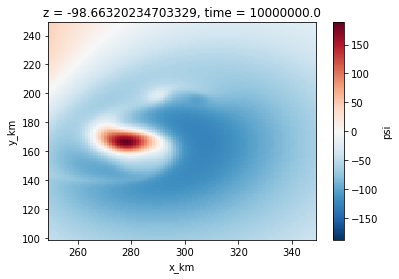

In [5]:
ds_in.psi.isel(z=0).plot(x='x_km',y='y_km')

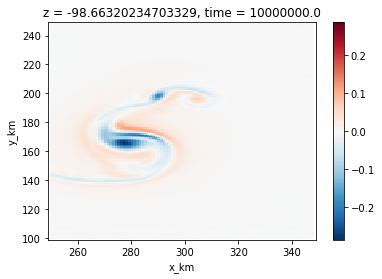

In [6]:
zeta_in = vorticity(ds_in.psi.isel(z=0))
(zeta_in/f0).plot(x='x_km',y='y_km')

---

## load outputs

In [7]:
ds_out = open_output(path_output+'output/output_full.nc', ds_in)
ds_bsqg = open_output(path_output+'output/output_bsqg.nc', ds_in)
print(ds_out)

<xarray.Dataset>
Dimensions:  (t: 1, x: 100, y: 150, z: 48)
Coordinates:
  * z        (z) float64 -98.66 -98.03 -97.34 -96.59 ... -1.293 -0.5691 -0.1148
    time     float32 10000000.0
    x_km     (x) float32 249.5 250.5 251.5 252.5 ... 345.5 346.5 347.5 348.5
    y_km     (y) float32 99.5 100.5 101.5 102.5 ... 245.5 246.5 247.5 248.5
  * x        (x) float32 249500.0 250500.0 251500.0 ... 347500.0 348500.0
  * y        (y) float32 99500.0 100500.0 101500.0 ... 247500.0 248500.0
Dimensions without coordinates: t
Data variables:
    mask     (y, x) float64 ...
    psi      (t, z, y, x) float64 -44.71 -45.64 -46.54 ... -26.15 -25.78 -25.4
    q        (t, z, y, x) float64 ...
    zeta     (t, z, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    u        (t, z, y, x) float64 nan -0.000916 -0.000904 ... 0.0003751 nan
    v        (t, z, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan


---

## compare bsq solution and true fields (from geostrophic streamfunction)

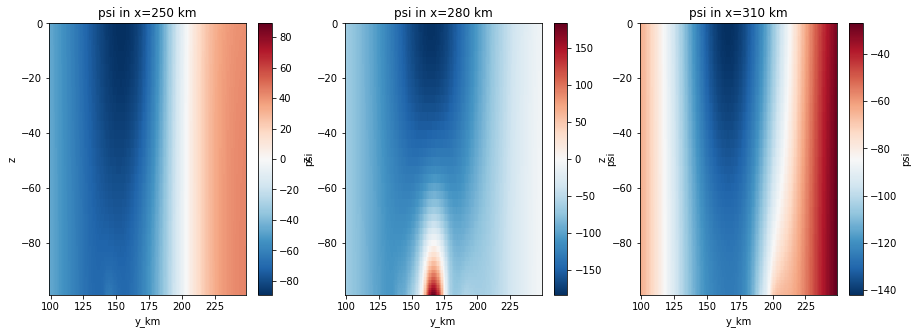

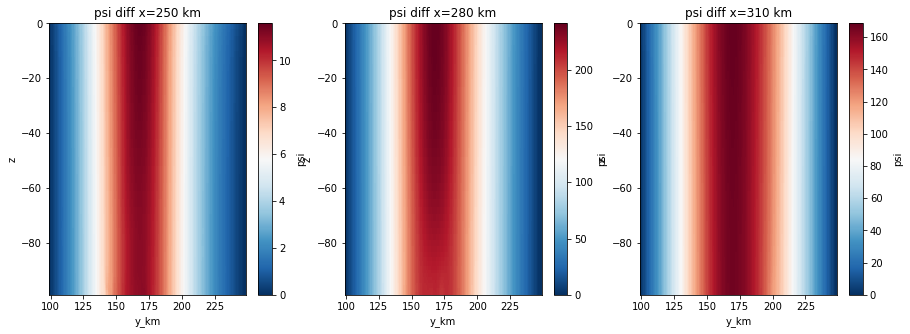

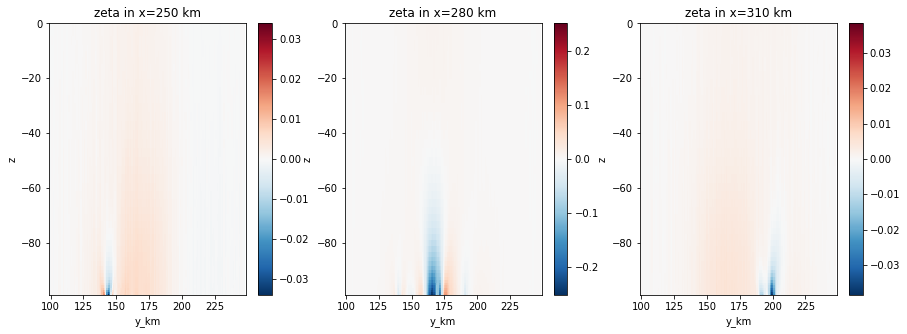

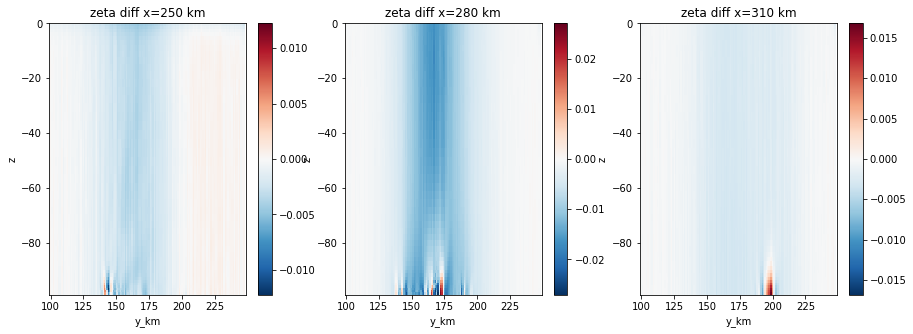

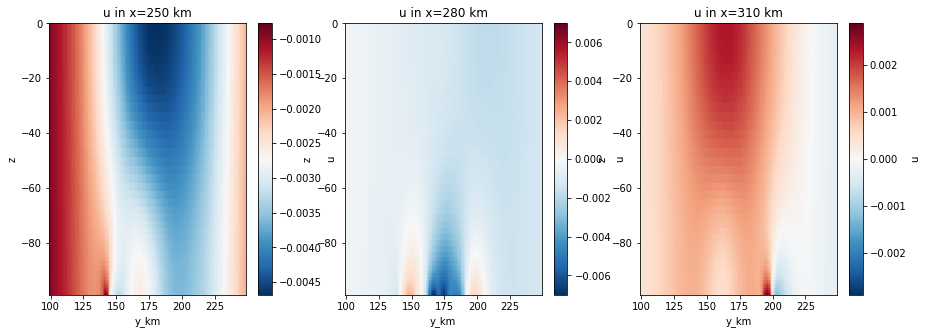

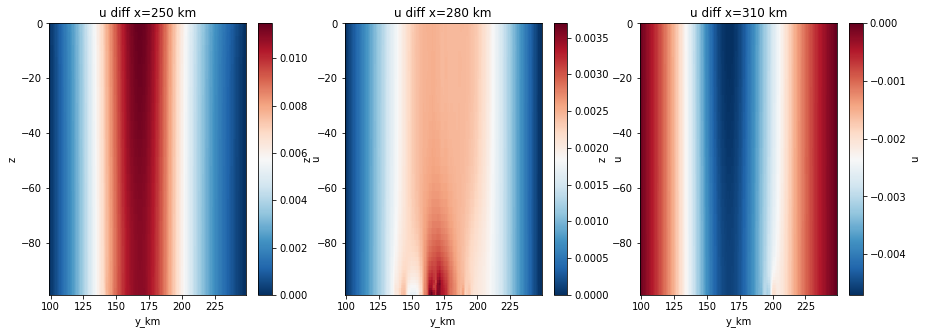

In [8]:
for v in ['psi','zeta','u']:

    fig = plt.figure(figsize=(15,5))

    iplt = 1    
    #
    for ix in [1, 30, 60]:
        ax = fig.add_subplot(1,3,iplt)
        toplt = ds_in[v]
        if v=='zeta':
            toplt = toplt/f0 
        toplt.isel(x=ix).plot(ax=ax, x='y_km', y='z', cmap='RdBu_r')
        ax.set_title('%s in x=%.0f km'%(v, ds_out.x_km.isel(x=ix)))
        iplt+=1    
    
    fig = plt.figure(figsize=(15,5))

    iplt = 1    
    #
    for ix in [1, 30, 60]:
        ax = fig.add_subplot(1,3,iplt)
        toplt = (ds_bsqg[v]-ds_in[v])
        if v=='zeta':
            toplt = toplt/f0 
        toplt.isel(x=ix).plot(ax=ax, x='y_km', y='z', cmap='RdBu_r')
        ax.set_title('%s diff x=%.0f km'%(v, ds_out.x_km.isel(x=ix)))
        iplt+=1

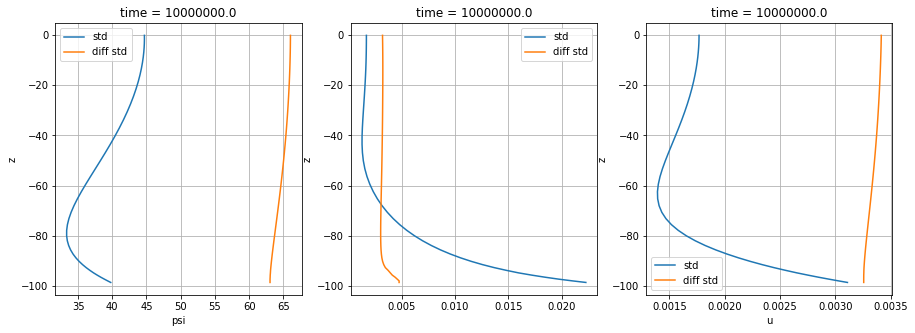

In [11]:
v = 'psi'

fig = plt.figure(figsize=(15,5))
iplt = 1    
for v in ['psi','zeta','u']:

    #
    ax = fig.add_subplot(1,3,iplt)
        
    std = ds_in[v].std(dim=['x','y'])
    diff = (ds_bsqg[v]-ds_in[v]).std(dim=['x','y'])
    if v=='zeta':
        std = std/f0
        diff = diff/f0
    std.plot(ax=ax, y='z', label='std')
    diff.plot(ax=ax, y='z', label='diff std')
    ax.legend()
    ax.grid()
    iplt+=1

---

## horizontal maps

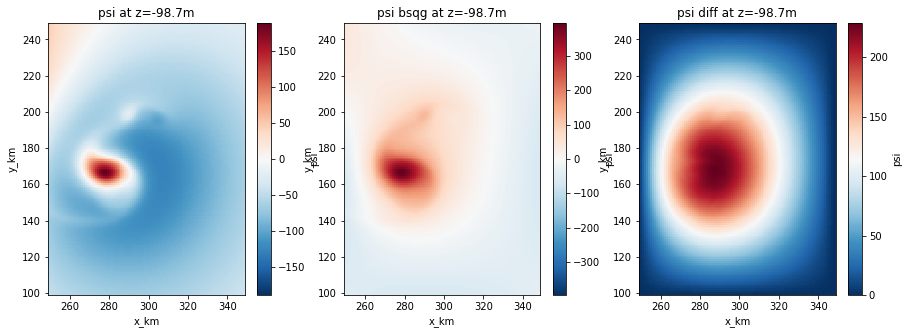

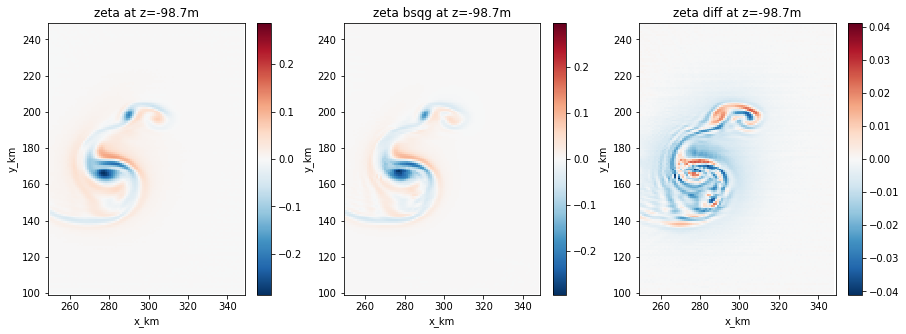

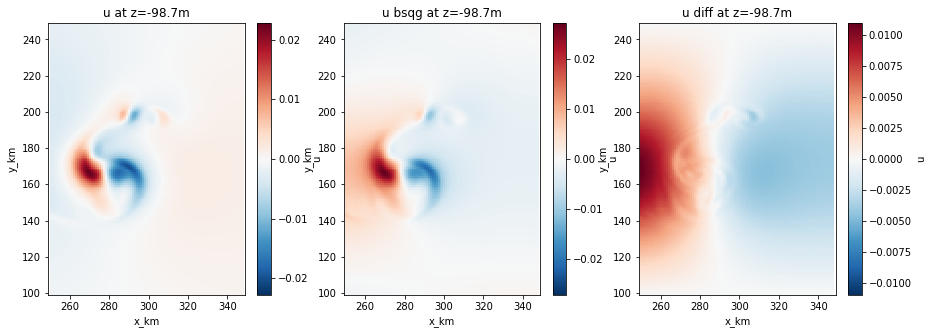

In [9]:
iz=0

for v in ['psi','zeta','u']:

    fig = plt.figure(figsize=(15,5))

    ax = fig.add_subplot(1,3,1)
    toplt = ds_in[v]
    if v=='zeta':
        toplt = toplt/f0 
    toplt.isel(z=iz).plot(ax=ax, x='x_km', y='y_km', cmap='RdBu_r')
    ax.set_title('%s at z=%.1fm'%(v, ds_out.z.isel(z=iz)))

    ax = fig.add_subplot(1,3,2)
    toplt = ds_bsqg[v]
    if v=='zeta':
        toplt = toplt/f0 
    toplt.isel(z=iz).plot(ax=ax, x='x_km', y='y_km', cmap='RdBu_r')
    ax.set_title('%s bsqg at z=%.1fm'%(v, ds_out.z.isel(z=iz)))

    ax = fig.add_subplot(1,3,3)
    toplt = (ds_bsqg[v]-ds_in[v])
    if v=='zeta':
        toplt = toplt/f0 
    toplt.isel(z=iz).plot(ax=ax, x='x_km', y='y_km', cmap='RdBu_r')
    ax.set_title('%s diff at z=%.1fm'%(v, ds_out.z.isel(z=iz)))
    

---

## show background

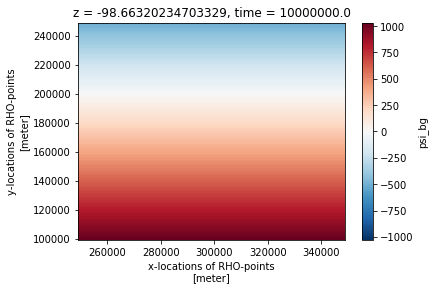

In [10]:
ds_in.psi_bg.isel(z=0).plot()